In [2]:
import tokenize
import pandas as pd
from textblob import TextBlob
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer=ToktokTokenizer()
import re
import spacy
nlp=spacy.load('en_core_web_sm',disable=['ner'])
from sklearn.utils import shuffle


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
df=pd.read_csv('Elon_musk.csv',encoding='latin1')
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
df1=df.drop('Unnamed: 0',axis=1)
df1

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
df2=shuffle(df1)
df2

,Text
1148,RT @SpaceX: SpaceX training of astronauts that...
1458,@tesla_addicted @Erdayastronaut No &amp; not p...
1587,@cleantechnica Significant improvements coming...
595,@tobyliiiiiiiiii @SpaceX @NASA @NASA_LSP @NASA...
1691,<U+0001F9D9><U+200D><U+2642><U+FE0F> https://t...
...,...
369,@chicago_glenn True haha
913,@tobyliiiiiiiiii @austinbarnard45 @Supercluste...
42,"@UniverCurious Extremely misleading image, as ..."
323,"As seen from an external observer, not the par..."


In [6]:
df2.isna().sum()

Text    0
dtype: int64

In [7]:
import numpy as np
df2.replace(r'^\s*$',np.nan,regex=True,inplace=True)
df2.dropna(axis=0,inplace=True)
df2

,Text
1148,RT @SpaceX: SpaceX training of astronauts that...
1458,@tesla_addicted @Erdayastronaut No &amp; not p...
1587,@cleantechnica Significant improvements coming...
595,@tobyliiiiiiiiii @SpaceX @NASA @NASA_LSP @NASA...
1691,<U+0001F9D9><U+200D><U+2642><U+FE0F> https://t...
...,...
369,@chicago_glenn True haha
913,@tobyliiiiiiiiii @austinbarnard45 @Supercluste...
42,"@UniverCurious Extremely misleading image, as ..."
323,"As seen from an external observer, not the par..."


In [8]:
df2.replace(to_replace=[r'\\t|\\n|\\r','\t|\n|\r'],value=["",""],regex=True,inplace=True)


In [9]:
df2

,Text
1148,RT @SpaceX: SpaceX training of astronauts that...
1458,@tesla_addicted @Erdayastronaut No &amp; not p...
1587,@cleantechnica Significant improvements coming...
595,@tobyliiiiiiiiii @SpaceX @NASA @NASA_LSP @NASA...
1691,<U+0001F9D9><U+200D><U+2642><U+FE0F> https://t...
...,...
369,@chicago_glenn True haha
913,@tobyliiiiiiiiii @austinbarnard45 @Supercluste...
42,"@UniverCurious Extremely misleading image, as ..."
323,"As seen from an external observer, not the par..."


In [10]:
df2['Text']=df2['Text'].str.encode('ascii','ignore').str.decode('ascii')
df2

,Text
1148,RT @SpaceX: SpaceX training of astronauts that...
1458,@tesla_addicted @Erdayastronaut No &amp; not p...
1587,@cleantechnica Significant improvements coming...
595,@tobyliiiiiiiiii @SpaceX @NASA @NASA_LSP @NASA...
1691,<U+0001F9D9><U+200D><U+2642><U+FE0F> https://t...
...,...
369,@chicago_glenn True haha
913,@tobyliiiiiiiiii @austinbarnard45 @Supercluste...
42,"@UniverCurious Extremely misleading image, as ..."
323,"As seen from an external observer, not the par..."


In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def remove_punctuations(Text):
    import string
    for punctuation in string.punctuation:
      Text=Text.replace(punctuation,'')
    return Text
df2['Text']=df2['Text'].apply(remove_punctuations)

In [13]:
df2

,Text
1148,RT SpaceX SpaceX training of astronauts that w...
1458,teslaaddicted Erdayastronaut No amp not possib...
1587,cleantechnica Significant improvements coming ...
595,tobyliiiiiiiiii SpaceX NASA NASALSP NASAJPL es...
1691,U0001F9D9U200DU2642UFE0F httpstcoxxvcWMrTwS
...,...
369,chicagoglenn True haha
913,tobyliiiiiiiiii austinbarnard45 SuperclusterHQ...
42,UniverCurious Extremely misleading image as do...
323,As seen from an external observer not the part...


In [14]:
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-26 18:31:08.217643: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-26 18:31:08.217755: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-26 18:31:08.217778: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
stopword_list=nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [17]:
def custom_remove_stopwords(Text, is_lower_case=False):
    tokens = tokenizer.tokenize(Text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [18]:
df2['Text']=df2['Text'].apply(custom_remove_stopwords)

In [19]:
def remove_special_charcters(Text):
   Text=re.sub('[^a-zA-z0-9\s]', '', Text)
   return Text

In [20]:
df2['Text']=df2['Text'].apply(remove_special_charcters)

In [21]:
def remove_html(Text):
    import re
    html_pattren=re.compile('<.*?>')
    return html_pattren.sub(r'',Text)

In [22]:
df2['Text']=df2['Text'].apply(remove_html)

In [23]:
def cleanse(word):
    rx = re.compile(r'\D*\d')
    if rx.match(word):
        return ''
    return word
def remove_alphanumeric(strings):
    nstrings = [" ".join(filter(None, (
    cleanse(word) for word in string.split()))) 
    for string in strings.split()]
    str1 = ' '.join(nstrings)
    return str1

In [24]:
df2['Text']=df2['Text'].apply(remove_alphanumeric)

In [25]:
df2

,Text
1148,RT SpaceX SpaceX training astronauts fly board...
1458,teslaaddicted Erdayastronaut No amp not possib...
1587,cleantechnica Significant improvements coming ...
595,tobyliiiiiiiiii SpaceX NASA NASALSP NASAJPL es...
1691,httpstcoxxvcWMrTwS
...,...
369,chicagoglenn True haha
913,tobyliiiiiiiiii SuperclusterHQ Good point Pro...
42,UniverCurious Extremely misleading image doesn...
323,seen external observer not participants


In [26]:
df2['sentiment'] = df2['Text'].apply(lambda df2: TextBlob(df2).sentiment)
df2

,Text,sentiment
1148,RT SpaceX SpaceX training astronauts fly board...,"(0.38333333333333336, 0.5444444444444444)"
1458,teslaaddicted Erdayastronaut No amp not possib...,"(0.0, 1.0)"
1587,cleantechnica Significant improvements coming ...,"(0.375, 0.875)"
595,tobyliiiiiiiiii SpaceX NASA NASALSP NASAJPL es...,"(0.0, 0.1)"
1691,httpstcoxxvcWMrTwS,"(0.0, 0.0)"
...,...,...
369,chicagoglenn True haha,"(0.275, 0.475)"
913,tobyliiiiiiiiii SuperclusterHQ Good point Pro...,"(0.35, 0.30000000000000004)"
42,UniverCurious Extremely misleading image doesn...,"(0.11249999999999999, 0.825)"
323,seen external observer not participants,"(0.0, 0.1)"


In [27]:
sentiment_series = df2['sentiment'].tolist()
sentiment_series

[Sentiment(polarity=0.38333333333333336, subjectivity=0.5444444444444444),
 Sentiment(polarity=0.0, subjectivity=1.0),
 Sentiment(polarity=0.375, subjectivity=0.875),
 Sentiment(polarity=0.0, subjectivity=0.1),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.8, subjectivity=0.75),
 Sentiment(polarity=0.0, subjectivity=0.15),
 Sentiment(polarity=1.0, subjectivity=1.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=-0.05, subjectivity=0.4),
 Sentiment(polarity=-0.25, subjectivity=0.8888888888888888),
 Sentiment(polarity=0.1708333333333333, subjectivity=0.275),
 Sentiment(polarity=0.1, subjectivity=1.0),
 Sentiment(polarity=0.0, subjectivity=0.1),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.09999999999999999, subjectivity=0.45),
 Sentiment(polarity=0.8, subjectivity=0.75),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.5, subjectivity=0.6),
 Sentiment(polarity=0.0, subj

In [28]:
columns = ['polarity', 'subjectivity']
df3 = pd.DataFrame(sentiment_series, columns=columns, index=df2.index)
df3

,polarity,subjectivity
1148,0.383333,0.544444
1458,0.000000,1.000000
1587,0.375000,0.875000
595,0.000000,0.100000
1691,0.000000,0.000000
...,...,...
369,0.275000,0.475000
913,0.350000,0.300000
42,0.112500,0.825000
323,0.000000,0.100000


In [29]:
result = pd.concat([df2,df3],axis=1)
result

,Text,sentiment,polarity,subjectivity
1148,RT SpaceX SpaceX training astronauts fly board...,"(0.38333333333333336, 0.5444444444444444)",0.383333,0.544444
1458,teslaaddicted Erdayastronaut No amp not possib...,"(0.0, 1.0)",0.000000,1.000000
1587,cleantechnica Significant improvements coming ...,"(0.375, 0.875)",0.375000,0.875000
595,tobyliiiiiiiiii SpaceX NASA NASALSP NASAJPL es...,"(0.0, 0.1)",0.000000,0.100000
1691,httpstcoxxvcWMrTwS,"(0.0, 0.0)",0.000000,0.000000
...,...,...,...,...
369,chicagoglenn True haha,"(0.275, 0.475)",0.275000,0.475000
913,tobyliiiiiiiiii SuperclusterHQ Good point Pro...,"(0.35, 0.30000000000000004)",0.350000,0.300000
42,UniverCurious Extremely misleading image doesn...,"(0.11249999999999999, 0.825)",0.112500,0.825000
323,seen external observer not participants,"(0.0, 0.1)",0.000000,0.100000


In [30]:
result.loc[result['polarity']>=0.3, 'Sentiment'] = "Positive"
result.loc[result['polarity']<0.3, 'Sentiment'] = "Negative"

In [31]:
result[0:20]

,Text,sentiment,polarity,subjectivity,Sentiment
1148,RT SpaceX SpaceX training astronauts fly board...,"(0.38333333333333336, 0.5444444444444444)",0.383333,0.544444,Positive
1458,teslaaddicted Erdayastronaut No amp not possib...,"(0.0, 1.0)",0.000000,1.000000,Negative
1587,cleantechnica Significant improvements coming ...,"(0.375, 0.875)",0.375000,0.875000,Positive
595,tobyliiiiiiiiii SpaceX NASA NASALSP NASAJPL es...,"(0.0, 0.1)",0.000000,0.100000,Negative
1691,httpstcoxxvcWMrTwS,"(0.0, 0.0)",0.000000,0.000000,Negative
1645,RT SpaceX Starship takes flight,"(0.0, 0.0)",0.000000,0.000000,Negative
1049,ErcXspace SpaceX Erdayastronaut MarcusHouseGam...,"(0.8, 0.75)",0.800000,0.750000,Positive
791,MKBHD accidental back shortly,"(0.0, 0.15)",0.000000,0.150000,Negative
231,DMCRyan Tesla awesome,"(1.0, 1.0)",1.000000,1.000000,Positive
1367,Erdayastronaut flcnhvy GerberKawasaki Videodrome,"(0.0, 0.0)",0.000000,0.000000,Negative


In [33]:
Mask = [Text.strip() for Text in df2.Text] 
Mask = [Text for Text in Mask if Text] 
Mask[0:10]   


['RT SpaceX SpaceX training astronauts fly board Dragons first operational mission complete crew arrives',
 'teslaaddicted Erdayastronaut No amp not possible scale',
 'cleantechnica Significant improvements coming SX air suspension soon via software update simultaneously',
 'tobyliiiiiiiiii SpaceX NASA NASALSP NASAJPL esa Actually side doesnt take launch',
 'httpstcoxxvcWMrTwS',
 'RT SpaceX Starship takes flight',
 'ErcXspace SpaceX Erdayastronaut MarcusHouseGame FelixSchlang Great render Note need arm',
 'MKBHD accidental back shortly',
 'DMCRyan Tesla awesome',
 'Erdayastronaut flcnhvy GerberKawasaki Videodrome']

In [34]:
text = ' '.join(Mask)
text 

'RT SpaceX SpaceX training astronauts fly board Dragons first operational mission complete crew arrives teslaaddicted Erdayastronaut No amp not possible scale cleantechnica Significant improvements coming SX air suspension soon via software update simultaneously tobyliiiiiiiiii SpaceX NASA NASALSP NASAJPL esa Actually side doesnt take launch httpstcoxxvcWMrTwS RT SpaceX Starship takes flight ErcXspace SpaceX Erdayastronaut MarcusHouseGame FelixSchlang Great render Note need arm MKBHD accidental back shortly DMCRyan Tesla awesome Erdayastronaut flcnhvy GerberKawasaki Videodrome long time teslaownersSV Goosebumps  merch Not sure tbh RT SpaceX Completed full duration test fire Raptor Vacuum engine SpaceXs rocket development facility McGregor Texas http westcoastbill SpaceX  years amp  billion wow RT Tesla Big updates  TransCanada Supercharging  Model deliveries  Leasing Model amp Model RT NASA Theyre coming home  Aug  astronauts AstroBehnken AstroDoug depart SpaceStation SpaceXs Crew Dra 

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off"); 

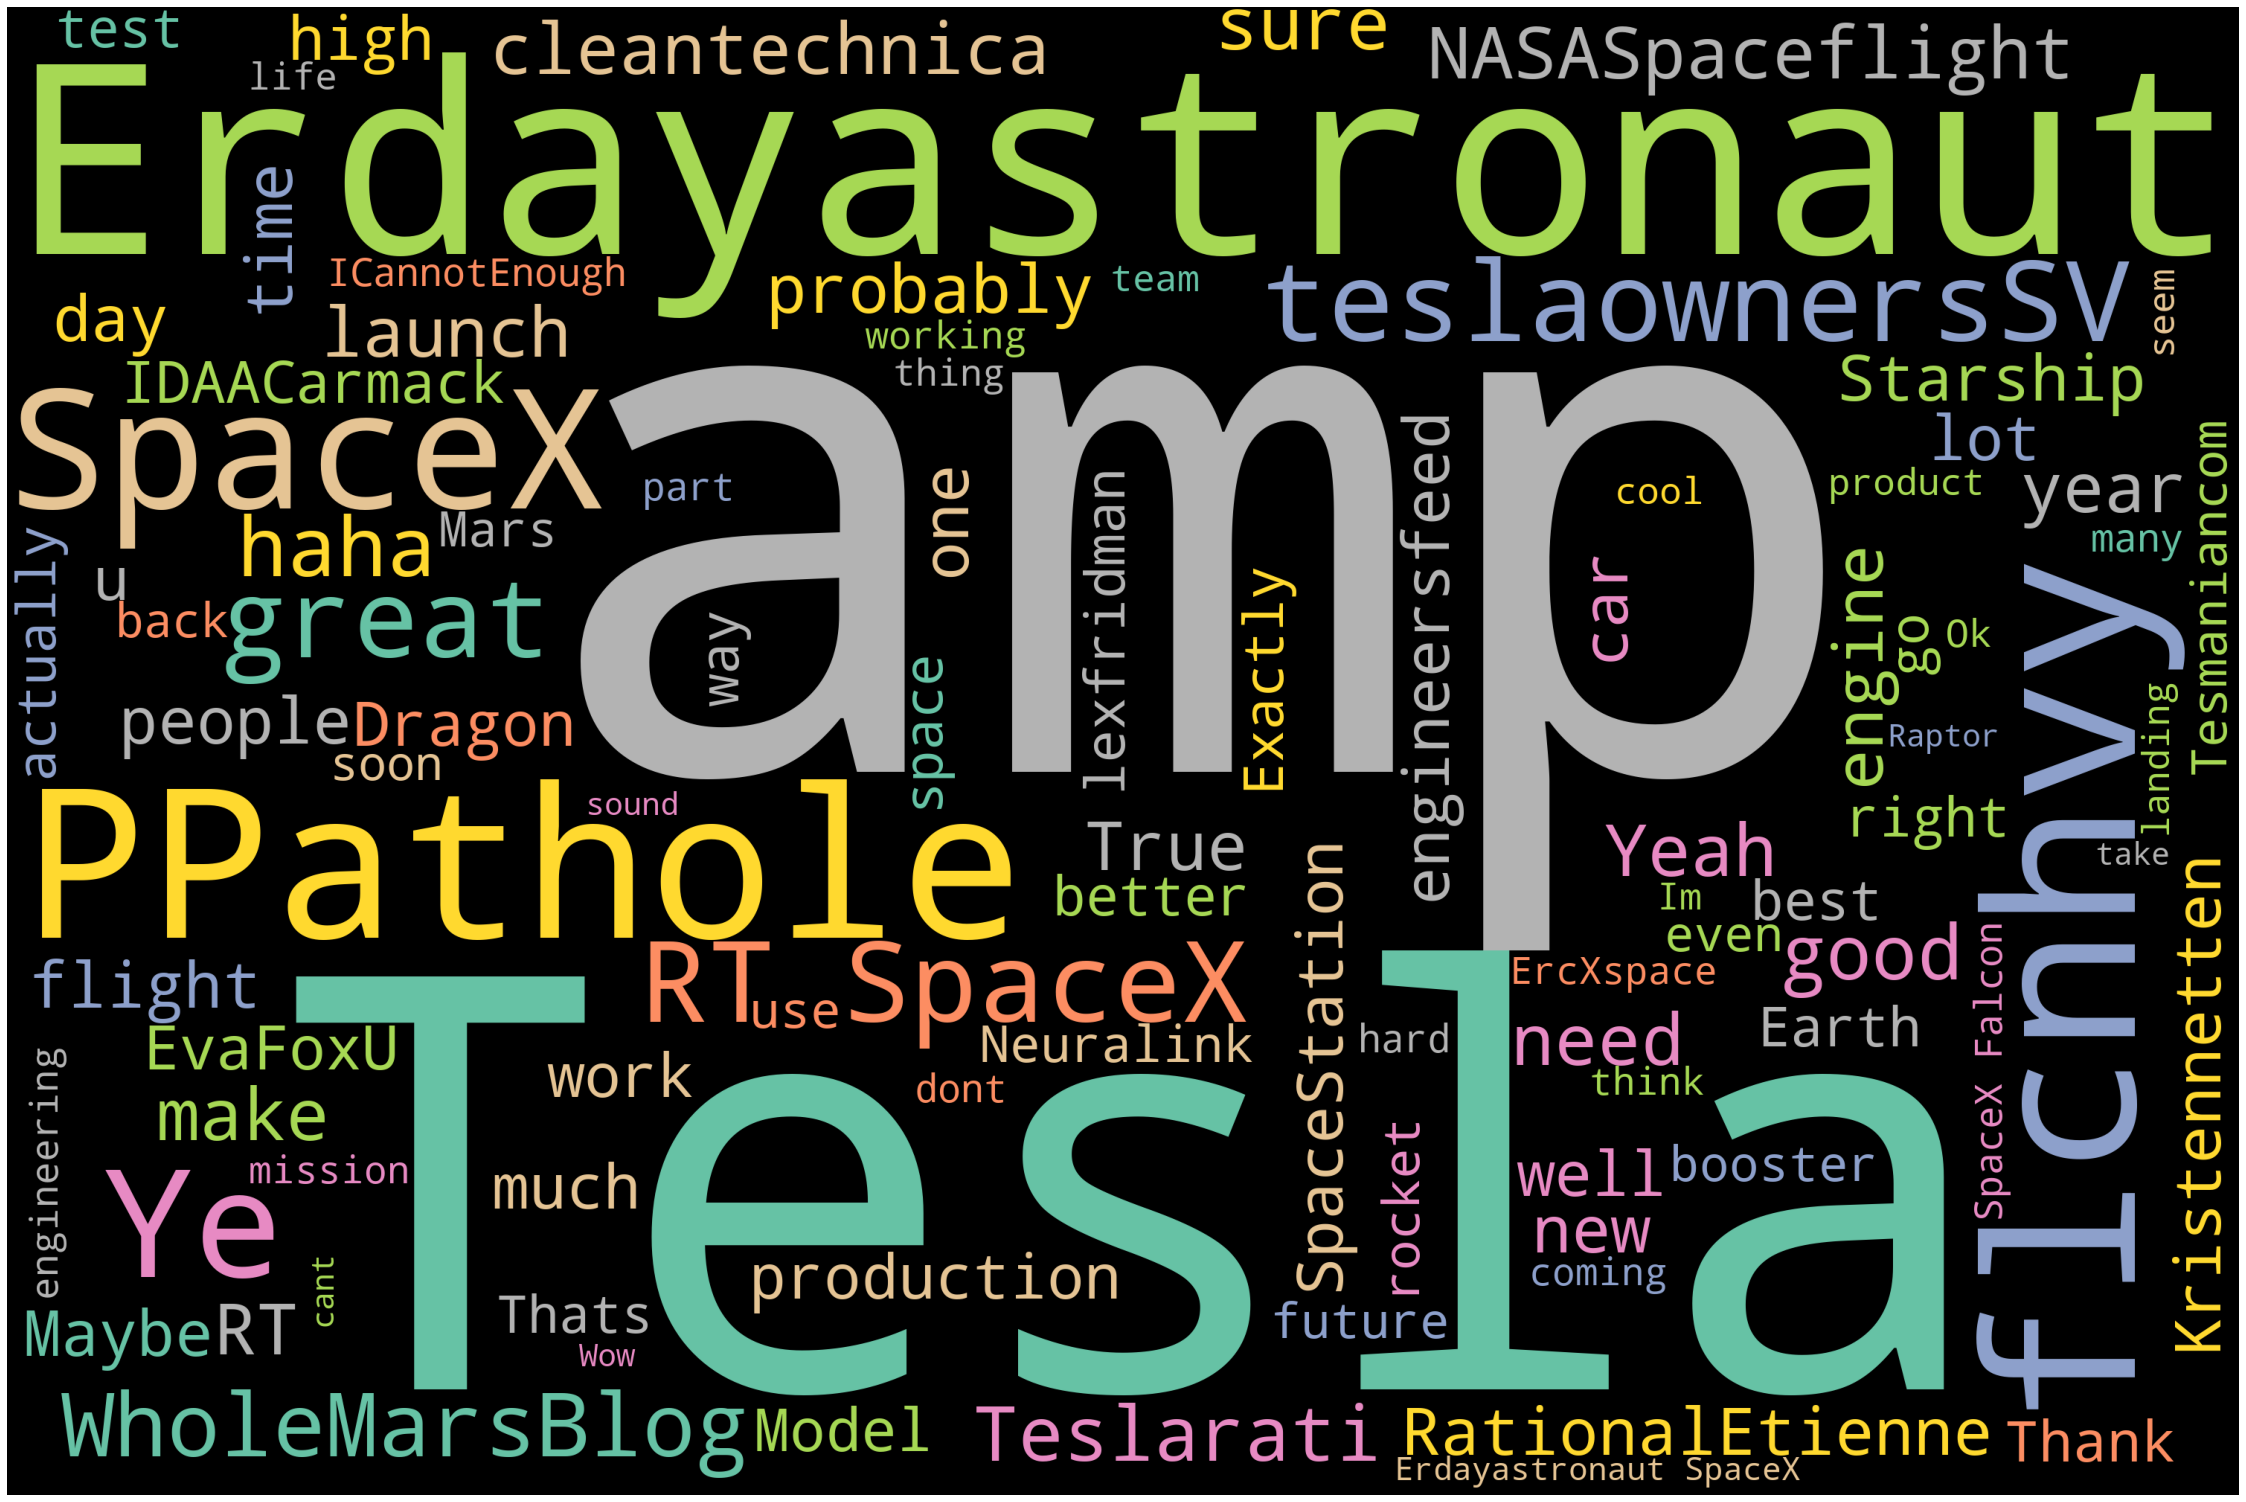

In [36]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)